# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [40]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways World Trav...
1,✅ Trip Verified | BA is barely a step above ...
2,Not Verified | Happy with the flight crew. Ha...
3,✅ Trip Verified | Horrible service from boar...
4,Not Verified | My wife and I are very disappo...


In [41]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [42]:
def remove_verified(text):
    return re.sub(r'^(✅ Trip Verified \||Not Verified \|)\s*', '', text.strip())

In [43]:
df['reviews'] = df['reviews'].apply(remove_verified)

In [44]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity


In [45]:
df['sentiment'] = df['reviews'].apply(get_sentiment)

In [46]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Display results
print("\nDataFrame after sentiment analysis:")
print(df[['reviews', 'sentiment', 'sentiment_category']].head())

# Calculate overall sentiment statistics
sentiment_stats = df['sentiment_category'].value_counts(normalize=True) * 100
print("\nOverall Sentiment Distribution:")
print(sentiment_stats)

# Calculate average sentiment score
avg_sentiment = df['sentiment'].mean()
print(f"\nAverage Sentiment Score: {avg_sentiment:.2f}")


DataFrame after sentiment analysis:
                                             reviews  sentiment  \
0  British Airways World Traveller Plus (Premium ...   0.175119   
1  BA is barely a step above low cost airlines. T...   0.008333   
2  Happy with the flight crew. Hadn't been on a p...   0.300000   
3  Horrible service from boarding to landing. I f...  -0.628333   
4  My wife and I are very disappointed with flyin...  -0.298000   

  sentiment_category  
0           Positive  
1            Neutral  
2           Positive  
3           Negative  
4           Negative  

Overall Sentiment Distribution:
sentiment_category
Positive    47.9
Negative    26.2
Neutral     25.9
Name: proportion, dtype: float64

Average Sentiment Score: 0.06


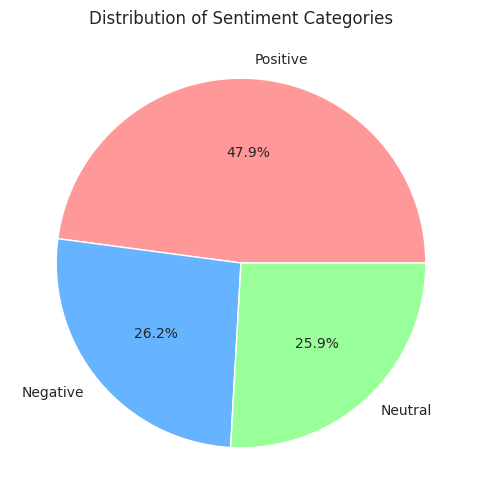

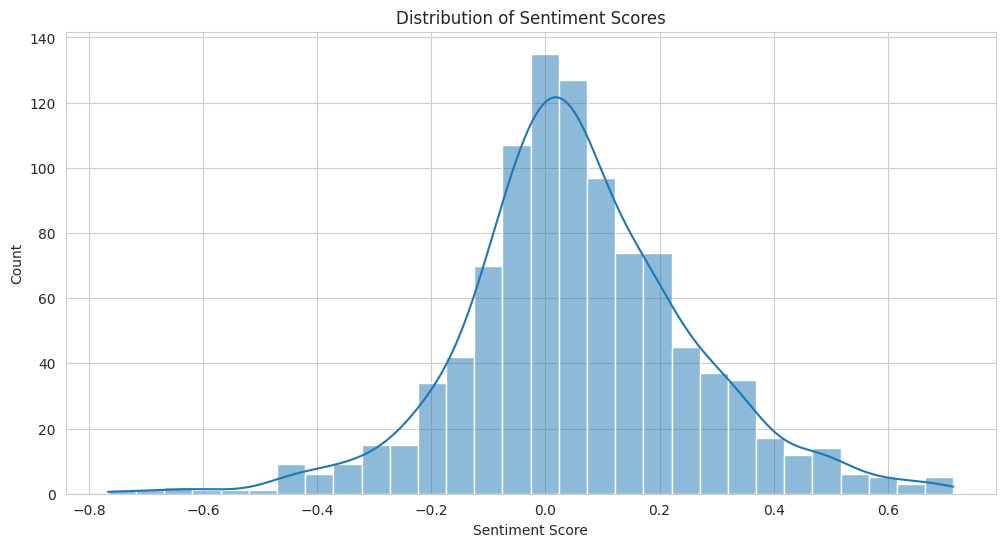

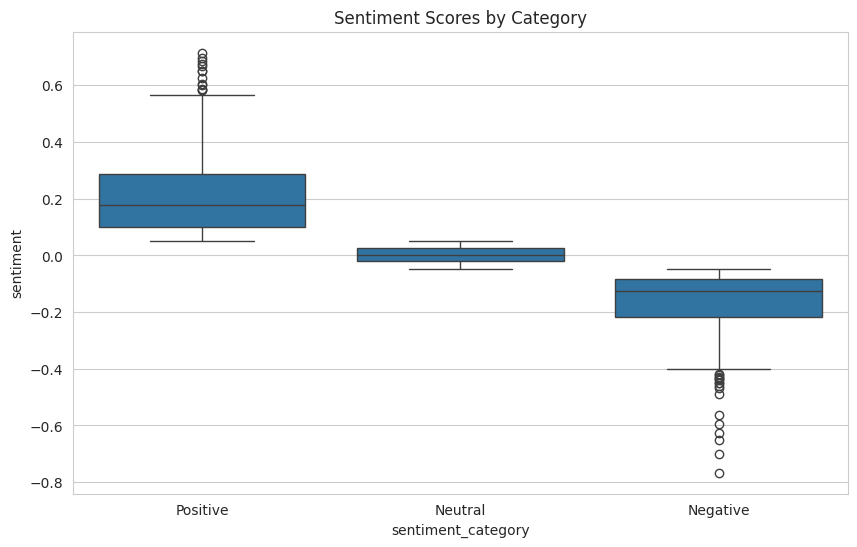

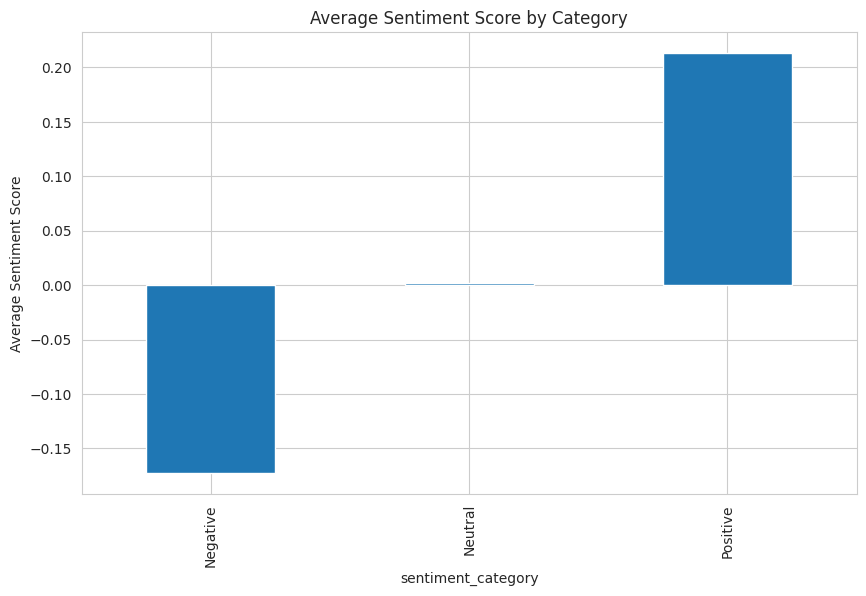

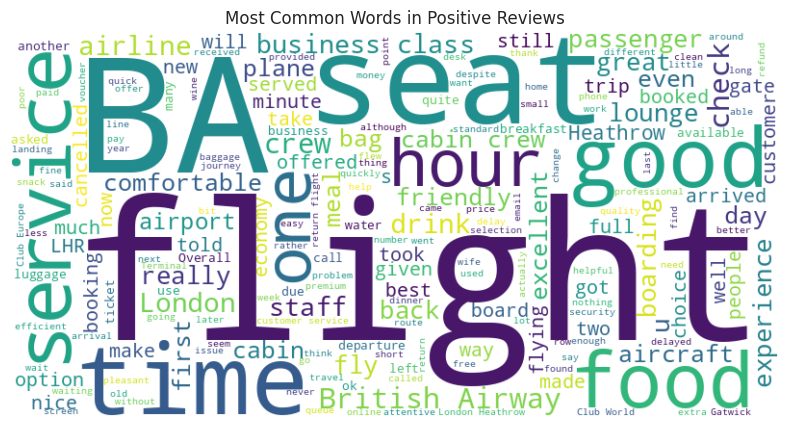

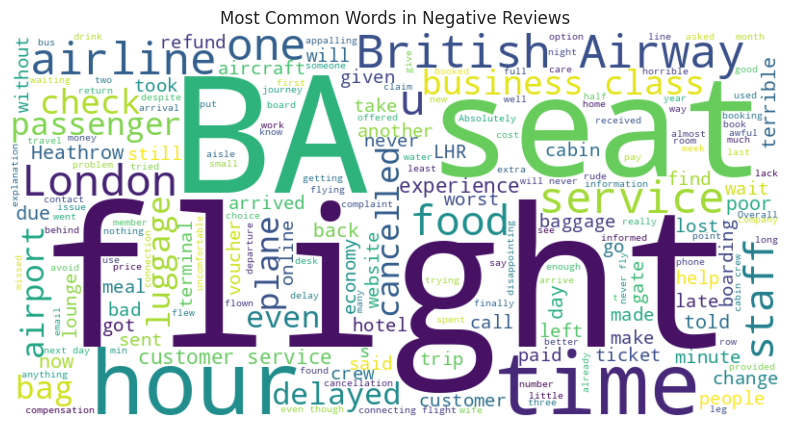

In [48]:
sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
df['sentiment_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Sentiment Categories')
plt.ylabel('')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='sentiment', data=df)
plt.title('Sentiment Scores by Category')
plt.show()

plt.figure(figsize=(10, 6))
df.groupby('sentiment_category')['sentiment'].mean().plot(kind='bar')
plt.title('Average Sentiment Score by Category')
plt.ylabel('Average Sentiment Score')
plt.show()

from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

positive_text = ' '.join(df[df['sentiment_category'] == 'Positive']['reviews'])
negative_text = ' '.join(df[df['sentiment_category'] == 'Negative']['reviews'])

generate_wordcloud(positive_text, 'Most Common Words in Positive Reviews')
generate_wordcloud(negative_text, 'Most Common Words in Negative Reviews')